# Author: Gaurav Khandave
# Date:10/17/2016

In [1]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import roc_auc_score


import pandas as pd
%pylab inline


data = pd.read_csv("train.csv")
y = data.pop("Survived")

Populating the interactive namespace from numpy and matplotlib


In [2]:
data


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
data['Age'].fillna(data.Age.mean(),inplace=True)

In [4]:
numeric_variables = list(data.dtypes[data.dtypes != "object"].index)
data[numeric_variables].head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,1,3,22.0,1,0,7.2500
1,2,1,38.0,1,0,71.2833
2,3,3,26.0,0,0,7.9250
3,4,1,35.0,1,0,53.1000
4,5,3,35.0,0,0,8.0500


In [5]:
X_numeric = data[numeric_variables]

In [6]:
model = RandomForestRegressor(n_estimators=7000, 
                                  oob_score=True, 
                                  n_jobs=-1, 
                                  random_state=42, 
                                  max_features="sqrt", 
                                  min_samples_leaf=2)
model.fit(X_numeric, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='sqrt', max_leaf_nodes=None, min_samples_leaf=2,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=7000, n_jobs=-1, oob_score=True, random_state=42,
           verbose=0, warm_start=False)

In [7]:
model.oob_score_

0.20494300696855616

In [8]:
y_oob = model.oob_prediction_
print "c-stat: ", roc_auc_score(y, y_oob)

c-stat:  0.766566537777


In [9]:
def describe_categorical(data):
    """
    Just like .describe(), but returns the results for
    categorical variables only.
    """
    from IPython.display import display, HTML
    display(HTML(data[data.columns[data.dtypes == "object"]].describe().to_html()))

In [10]:
describe_categorical(data)

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Graham, Mr. George Edward",male,CA. 2343,C23 C25 C27,S
freq,1,577,7,4,644


In [11]:
data.drop(["Name", "Ticket", "PassengerId"], axis=1, inplace=True)

In [12]:
def clean_cabin(x):
    try:
        return x[0]
    except TypeError:
        return "None"

data["Cabin"] = data.Cabin.apply(clean_cabin)

In [13]:
data

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,male,22.000000,1,0,7.2500,None,S
1,1,female,38.000000,1,0,71.2833,C,C
2,3,female,26.000000,0,0,7.9250,None,S
3,1,female,35.000000,1,0,53.1000,C,S
4,3,male,35.000000,0,0,8.0500,None,S
5,3,male,29.699118,0,0,8.4583,None,Q
6,1,male,54.000000,0,0,51.8625,E,S
7,3,male,2.000000,3,1,21.0750,None,S
8,3,female,27.000000,0,2,11.1333,None,S
9,2,female,14.000000,1,0,30.0708,None,C


In [14]:
data.Embarked.fillna("C",inplace=True)

categorical_variables = ['Sex', 'Cabin', 'Embarked']

for variable in categorical_variables:
    # Fill missing data with the word "Missing"
    data[variable].fillna("Missing", inplace=True)
    # Create array of dummies
    dummies = pd.get_dummies(data[variable], prefix=variable)
    # Update X to include dummies and drop the main variable
    data = pd.concat([data, dummies], axis=1)
    data.drop([variable], axis=1, inplace=True)

# data.drop(["Sex"], axis=1, inplace=True)

In [15]:
def printall(X, max_rows=10):
    from IPython.display import display, HTML
    display(HTML(X.to_html(max_rows=max_rows)))
    
printall(data)

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_None,Cabin_T,Embarked_C,Embarked_Q,Embarked_S
0,3,22.000000,1,0,7.2500,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,1,38.000000,1,0,71.2833,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,3,26.000000,0,0,7.9250,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,1,35.000000,1,0,53.1000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,3,35.000000,0,0,8.0500,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,27.000000,0,0,13.0000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
887,1,19.000000,0,0,30.0000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
888,3,29.699118,1,2,23.4500,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
889,1,26.000000,0,0,30.0000,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [16]:
# model = RandomForestRegressor(n_estimators=7000, 
#                                   oob_score=True, 
#                                   n_jobs=-1, 
#                                   random_state=42, 
#                                   max_features="sqrt", 
#                                   min_samples_leaf=2)
# model.fit(data, y)
# print "C-stat: ", roc_auc_score(y, model.oob_prediction_)

In [17]:
model.feature_importances_

array([ 0.26297821,  0.10758921,  0.23149464,  0.05422463,  0.04079467,
        0.30291865])

In [18]:
# feature_importances = pd.Series(model.feature_importances_, index=data.columns)
# feature_importances.sort()
# feature_importances.plot(kind="barh", figsize=(7,6));

/Users/gauravkhandave/anaconda/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:25: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting


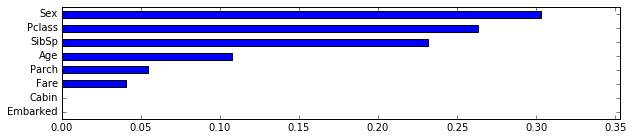

In [19]:
def graph_feature_importances(model, feature_names, autoscale=True, headroom=0.05, width=10, summarized_columns=None):

    
    if autoscale:
        x_scale = model.feature_importances_.max()+ headroom
    else:
        x_scale = 1
    
    feature_dict=dict(zip(feature_names, model.feature_importances_))
    
    if summarized_columns: 
        #some dummy columns need to be summarized
        for col_name in summarized_columns: 
            #sum all the features that contain col_name, store in temp sum_value
            sum_value = sum(x for i, x in feature_dict.iteritems() if col_name in i )  
            
            #now remove all keys that are part of col_name
            keys_to_remove = [i for i in feature_dict.keys() if col_name in i ]
            for i in keys_to_remove:
                feature_dict.pop(i)
            #lastly, read the summarized field
            feature_dict[col_name] = sum_value
        
    results = pd.Series(feature_dict.values(), index=feature_dict.keys())
    results.sort(axis=1)
    results.plot(kind="barh", figsize=(width,len(results)/4), xlim=(0,x_scale))
    
graph_feature_importances(model, data.columns, summarized_columns=categorical_variables)

In [20]:


%%timeit
model = RandomForestRegressor(1001, oob_score=True, n_jobs=1, random_state=42)
model.fit(data, y)



1 loop, best of 3: 3.33 s per loop


In [21]:
%%timeit
model = RandomForestRegressor(1001, oob_score=True, n_jobs=-1, random_state=42)
model.fit(data, y)

1 loop, best of 3: 3.05 s per loop


30 trees
C-stat:  0.854312466047

50 trees
C-stat:  0.861854088774

100 trees
C-stat:  0.862170986057

200 trees
C-stat:  0.862426634285

500 trees
C-stat:  0.863284121049

991 trees
C-stat:  0.864029761715

1000 trees
C-stat:  0.863864655567

1001 trees
C-stat:  0.863904600603

2000 trees
C-stat:  0.863715527434

5000 trees
C-stat:  0.862911300717

7000 trees
C-stat:  0.862871355681



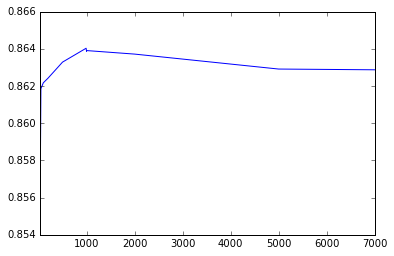

In [22]:
results = []
n_estimator_options = [30, 50, 100, 200, 500, 991, 1000, 1001, 2000,5000,7000]

for trees in n_estimator_options:
    model = RandomForestRegressor(trees, oob_score=True, n_jobs=-1, random_state=42)
    model.fit(data, y)
    print trees, "trees"
    roc = roc_auc_score(y, model.oob_prediction_)
    print "C-stat: ", roc
    results.append(roc)
    print ""
    
pd.Series(results, n_estimator_options).plot();

auto option
C-stat:  0.863904600603

None option
C-stat:  0.863904600603

sqrt option
C-stat:  0.86326281703

log2 option
C-stat:  0.86326281703

0.9 option
C-stat:  0.863819384527

0.2 option
C-stat:  0.863097710883



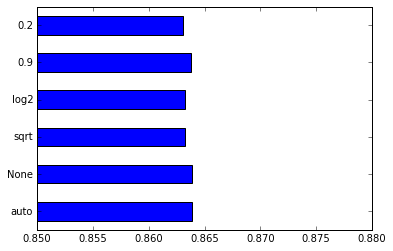

In [23]:
results = []
max_features_options = ["auto", None, "sqrt", "log2", 0.9, 0.2]

for max_features in max_features_options:
    model = RandomForestRegressor(n_estimators=1001, oob_score=True, n_jobs=-1, random_state=42, max_features=max_features)
    model.fit(data, y)
    print max_features, "option"
    roc = roc_auc_score(y, model.oob_prediction_)
    print "C-stat: ", roc
    results.append(roc)
    print ""
    
pd.Series(results, max_features_options).plot(kind="barh", xlim=(.85,.88));

1 min samples
C-stat:  0.863864655567

2 min samples
C-stat:  0.869683315758

3 min samples
C-stat:  0.871440897325

4 min samples
C-stat:  0.873608581259

5 min samples
C-stat:  0.874290309867

6 min samples
C-stat:  0.873981401591

7 min samples
C-stat:  0.873283694969

8 min samples
C-stat:  0.871803065648

9 min samples
C-stat:  0.869257235377

10 min samples
C-stat:  0.867355851681



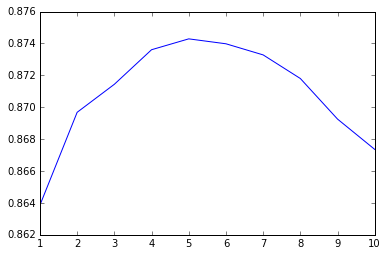

In [24]:


results = []
min_samples_leaf_options = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

for min_samples in min_samples_leaf_options:
    model = RandomForestRegressor(n_estimators=1001, 
                                  oob_score=True, 
                                  n_jobs=-1, 
                                  random_state=42, 
                                  max_features="auto", 
                                  min_samples_leaf=min_samples)
    model.fit(data, y)
    print min_samples, "min samples"
    roc = roc_auc_score(y, model.oob_prediction_)
    print "C-stat: ", roc
    results.append(roc)
    print ""
    
pd.Series(results, min_samples_leaf_options).plot();



### Final ROC score

In [27]:


model = RandomForestRegressor(n_estimators=1001, 
                              oob_score=True, 
                              n_jobs=-1, 
                              random_state=42, 
                              max_features="auto", 
                              min_samples_leaf=5)
model.fit(data, y)
roc = roc_auc_score(y, model.oob_prediction_)
print "C-stat: ", roc



C-stat:  0.8743275919


### This is more precise value